# Compte rendu de TP <br/>
Régression linéaire

## Rappel des rèlges de notation

Le TP de chaque étudiant sera évalué via la plateforme “Classgrade”. Pour cela, vous devez déposer
un unique fichier anonymisé (votre nom doit apparaître uniquement dans le nom du fichier lui-même)
sous format ipynb sur le site http://peergrade.enst.fr/.<br/>
Vous devez **charger votre fichier, avant le jeudi 18/09/2018, 23h59**. Entre le vendredi 19/09/2018 et
**le vendredi 26/09/2018, 23h59, vous devrez noter 2 copies** qui vous seront assignées anonymement, en
tenant compte du barème suivant pour chaque question du TP :
 * 0 (manquant/ non compris/ non fait/ insuffisant)
 * 1 (passable/partiellement satisfaisant)
 * 2 (bien)
 
Ensuite, il faudra également évaluer de la même manière les points suivants (qui correspondent à 3
questions supplémentaires) :
 * aspect global de présentation : qualité de rédaction, orthographe, présentation, graphes, titres,
etc...
 * aspect global du code : indentation, Style PEP8, lisibilité du code, commentaires adaptés
 * Point particulier : absence de bug sur votre machine
 
Des commentaires pourront être ajoutés question par question si vous en sentez le besoin ou l’utilité pour
aider la personne notée à s’améliorer, et de manière obligatoire si vous ne mettez pas 2/2 à une question.
**Enfin, veillez à rester polis et courtois dans vos retours.**

## Exercice:

### Sujet

(Analyse de la base de données “investment data”) La lecture d’un tutoriel
pandas pourra être utile : http://pandas.pydata.org/pandas-docs/stable/tutorials.html.
Nous travaillons sur la base de données Investment Data Set 1 qui peut être téléchargée depuis
https://bitbucket.org/portierf/shared_files/downloads/invest.txt.<br/> Avant de commencer, on
réalisera l’exercice 12 du polycopié : ”explicit formulas when p “ 1 for prediction intervals", se trouvant
dans le chapitre 3 : “Confidence intervals and hypothesis testing”. On pourra aussi lire la section 3.1.1 de
ce même chapitre du polycopié.

In [147]:
#Cellule d'import 

#pandas
import pandas as pd
#graph
import matplotlib.pyplot as plt
import numpy as np
import math

### Question 1

Importer la base de données “invest.txt” et l’afficher dans une forme lisible, e.g. une table contenant
les 5 premières observations.

In [148]:
investDF = pd.read_csv("https://bitbucket.org/portierf/shared_files/downloads/invest.txt", header=0,sep=" ")
print(investDF.head())

   year     gnp  invest     cpi  interest
0  1968   873.4   133.3   82.54      5.16
1  1969   944.0   149.3   86.79      5.87
2  1970   992.7   144.2   91.45      5.95
3  1971  1077.6   166.4   96.01      4.88
4  1972  1185.9   195.0  100.00      4.50


In [149]:
#Petit apperçu des données
investDF.describe(include='all')      

,year,gnp,invest,cpi,interest
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1975.000000,1748.646667,276.006667,131.401333,7.452667
std,4.472136,738.145808,117.582691,40.286606,2.812245
min,1968.000000,873.400000,133.300000,82.540000,4.500000
25%,1971.500000,1131.750000,180.700000,98.005000,5.480000
50%,1975.000000,1549.200000,229.800000,125.790000,6.250000
75%,1978.500000,2290.850000,394.450000,156.920000,9.055000
max,1982.000000,3057.500000,471.500000,207.230000,13.420000


### Question 2

Réaliser le graph suivant : la variable “Gross National Product” (GNP, column “gnp”) est en abscisse
et la variable “Investment” (column “invest”) est en ordonnée. Transformer les 2 variables précédentes
en échelle logarithmique. Nous travaillerons désormais avec les 2 nouvelles variables.

In [150]:
# Changement d'echelle
investDF['invest']= investDF.invest.apply(lambda x: math.log(x))
investDF['gnp']= investDF.gnp.apply(lambda x: math.log(x))

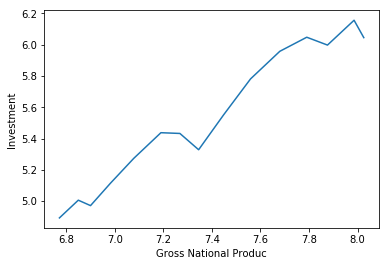

In [151]:
plt.plot(investDF.gnp,investDF.invest)
plt.xlabel('Gross National Produc')
plt.ylabel('Investment')
plt.show()

NOTE : Lorsque l’on traite des données monétaires, on travaille souvent en échelle logarithmique (pour
prendre en compte les différences d’échelle).

### Question 3

Pour la régression de ”Investment” (variable à expliquer, output) sur ”GNP” (variable explicative,
covariable), estimer l’intercept et la pente, leurs écart-types, ainsi que le coefficient de détermination.
Les afficher dans une forme lisible. Dans la suite le vecteur contenant l’intercept et la pente est noté
θˆ
n P R
2
.

In [155]:
n=investDF.shape[0]
Ymean=investDF.invest.mean() 
Xtildemean=investDF.gnp.mean() 

Xtilde=np.array(investDF.gnp.values)
Y=np.array(investDF.invest.values)

#Calcul de ma pente
beta1=np.dot(np.transpose(Xtilde-Xtildemean),(Y-Ymean))/np.dot(np.transpose(Xtilde-Xtildemean),(Xtilde-Xtildemean))
print('beta1 estimé = '+ str(beta1)+" (correspond à la pente)")

#Calcul de l'intercept
beta0=Ymean - beta1 * Xtildemean
print('beta0 estimé =' + str(beta0)+" (correspond à l'intercept)")



#Calcul du coefficient de determination
Yestime=beta0+beta1*Xtilde
Rsquare=(np.dot(np.transpose(Yestime-Ymean),Yestime-Ymean)/np.dot(np.transpose(Y-Ymean),Y-Ymean))
print("Le coéficient de determination vaut "+str(Rsquare))

Testime=np.array([beta0,beta1])

# Calcul de sigma estime
from numpy.linalg import matrix_rank
X=np.array([np.ones(n),Xtilde])
sigma_estime=np.sqrt(np.dot(np.transpose(Y-np.dot(np.transpose(X),Testime)),Y-np.dot(np.transpose(X),Testime))/(n-matrix_rank(X)))


#Calculs des ecarts types
Vbeta0=(sigma_estime**2)*((1/n)+(Xtildemean*Xtildemean/np.dot(np.transpose(Xtilde-Xtildemean),Xtilde-Xtildemean)))
Vbeta1=(sigma_estime**2)*((1/np.dot(np.transpose(Xtilde-Xtildemean),Xtilde-Xtildemean)))

print("L'écart type de beta0 vaut "+str(np.sqrt(Vbeta0)))
print("L'écart type de beta1 vaut "+str(np.sqrt(Vbeta1)))

beta1 estimé = 1.015281401598871 (correspond à la pente)
beta0 estimé =-1.9635913352301815 (correspond à l'intercept)
Le coéficient de determination vaut 0.9627572956057854
0.08761471654613977
L'écart type de beta0 vaut 0.4095472716623086
L'écart type de beta1 vaut 0.055383060354852874


### Question 4

La pente estimée précédemment est-elle statistiquement significative ? On fera un test de student
(t-test). Donner la valeur de la statistique de test ainsi que la p-valeur.

On pose l'hypothese que la pente estimée n'est pas statistiquement significative soit beta1 = 0

In [157]:
from scipy import stats as scs

Tj= beta1/(np.sqrt(Vbeta1))
print(Tj)

p = matrix_rank(X)*(1-scs.t.cdf(Tj, X.shape[1] - matrix_rank(X)))
print('La p-value vaut :'+str(p))

18.331984456866657
La p-value vaut :1.1363709973011282e-10


A partir de la pvalue on peut rejeter l'hypothese H0

In [108]:
X=np.array([np.ones(n),Xtilde])

In [138]:
len(X
)

2

In [112]:
np.dot(np.transpose(X),Testime)

array([4.91229397, 4.99121436, 5.04228539, 5.12560255, 5.22283162,
       5.33650915, 5.41584191, 5.49415206, 5.59915465, 5.71111841,
       5.83343218, 5.94607347, 6.03268086, 6.14381874, 6.18440017])

In [111]:
np.transpose(X)

array([[1.        , 6.77239364],
       [1.        , 6.85012617],
       [1.        , 6.9004285 ],
       [1.        , 6.98249163],
       [1.        , 7.07825726],
       [1.        , 7.19022378],
       [1.        , 7.26836248],
       [1.        , 7.34549395],
       [1.        , 7.4489161 ],
       [1.        , 7.55919466],
       [1.        , 7.67966743],
       [1.        , 7.79061331],
       [1.        , 7.87591714],
       [1.        , 7.98538224],
       [1.        , 8.02535287]])